In [6]:
import numpy as np
import scipy.fft

In [7]:
def rand_sig(n):
    signal = []
    for i in range(n):
      distr = np.random.uniform(-100, 100, 2)
      signal.append((round(distr[0],4), round(distr[1],4)))
    return signal

def write_to_file(signal, filename):
    with open(filename, 'w') as file:
        for point in signal:
            file.write(f"{point[0]} {point[1]}\n")
    file.close()

def to_complex(sig):
  sig1 = sig.copy()
  for i in range(len(sig1)):
    sig1[i] = complex(sig1[i][0], sig1[i][1])
  return sig1

In [18]:
sig1 = rand_sig(8)
sig2 = rand_sig(8)
write_to_file(sig1, 'sig1.txt')
write_to_file(sig2, 'sig2.txt')
cx_sig1 = to_complex(sig1)
cx_sig2 = to_complex(sig2)

## Задание №1
Реализовать на С или С++ алгоритмы непосредственного вычисления ДПФ и ОДПФ по формулам (1) и (2) для комплексного входного сигнала с двойной точностью (double). Входные данные загружать из текстового файла (разделитель – пробел), сгенерированного, например, в MATLAB.  

## Задание №2
Реализовать на С или С++ алгоритмы прямого и обратного БПФ для комплексного входного сигнала длиной n 2 , n – любое натуральное число: а) с прореживанием по времени и двоично-инверсными перестановками (вариант 1);


## Задания №3
Убедиться в корректности работы алгоритмов:
а) проверить выполнение равенства X  ОДПФ ДПФX, а также равенства X  ОБПФ БПФX;
б) сравнить результаты ДПФ(Х) и БПФ(Х);
в) сравнить результаты работы реализованного алгоритма, например, с результатами процедуры fft, встроенной в MATLAB.


In [19]:
import os
dir_fd = os.open('../maincode/', os.O_RDONLY)
def opener(path, flags):
  return os.open(path, flags, dir_fd=dir_fd)
c_dft = []
c_idft = []
c_fft = []
c_ifft = []
with open("DFT.txt", 'r', opener=opener) as file:
  for line in file:
    new_line = line.split(" ")
    c_dft.append(complex(float(new_line[0]), float(new_line[1])))

with open("IDFT.txt", 'r', opener=opener) as file:
  for line in file:
    new_line = line.split(" ")
    c_idft.append(complex(float(new_line[0]), float(new_line[1])))

with open("FFT.txt", 'r', opener=opener) as file:
  for line in file:
    new_line = line.split(" ")
    c_fft.append(complex(float(new_line[0]), float(new_line[1])))

with open("IFFT.txt", 'r', opener=opener) as file:
  for line in file:
    new_line = line.split(" ")
    c_ifft.append(complex(float(new_line[0]), float(new_line[1])))

os.close(dir_fd)

In [20]:
pyt_fft = scipy.fft.fft(cx_sig1)/np.sqrt(len(cx_sig1))

mse = 0
for i in range(len(pyt_fft)):
  mse += abs((cx_sig1[i] - c_idft[i])**2)
print("Mse between signal before my_dft and signal after my_dft + my_inv_dft:", mse / len(cx_sig1))

mse = 0
for i in range(len(pyt_fft)):
  mse += abs((cx_sig1[i] - c_ifft[i])**2)
print("Mse between signal before my_fft and signal after my_fft + my_inv_fft:", mse / len(cx_sig2))

mse = 0
for i in range(len(pyt_fft)):
  mse += abs((pyt_fft[i] - c_dft[i])**2)
print("Mse between python fft and my dft on c++:", mse / len(pyt_fft))

mse = 0
for i in range(len(pyt_fft)):
  mse += abs((pyt_fft[i] - c_fft[i])**2)
print("Mse between python fft and my fft on c++:", mse / len(pyt_fft))

Mse between signal before my_dft and signal after my_dft + my_inv_dft: 2.7878344390510557e-27
Mse between signal before my_fft and signal after my_fft + my_inv_fft: 1.0022477800832955e-27
Mse between python fft and my dft on c++: 1.710472309648747e-27
Mse between python fft and my fft on c++: 2.3665827156630354e-28


In [21]:
pyt_fft = scipy.fft.fft(cx_sig1)/np.sqrt(len(cx_sig1))

mse = 0
for i in range(len(pyt_fft)):
  print(pyt_fft[i])

(-51.07563095264951-142.78875933076804j)
(-29.43700021358529-53.123729224711845j)
(9.14080471573756+39.36753364645796j)
(6.430535143055758+35.14705867009124j)
(-2.6202195330258125-42.35661543188974j)
(-16.545800213585295-23.992629224711838j)
(-37.75586051543852-12.106375200694876j)
(-7.2901648569442425-59.25954132990875j)


### Видно что ошибка реализованного на С++ БПФ ниже, чем у просто ДПФ. Думаю это связанно с тем, что мы сравниваем с функцией, в которой реализован алгоритм БПФ.

## Задание N4
Проанализировать зависимость времени выполнения БПФ и непосредственного вычисления ДПФ от длины N преобразования.

In [22]:
import matplotlib.pyplot as plt
dir_fd = os.open('../maincode/', os.O_RDONLY)
x = []
y1 = []
y2 = []
with open("time_dft.txt", "r", opener=opener) as file:
  for line in file:
    new_line = line.split(" ")
    x.append(2**int(new_line[0]))
    y1.append(float(new_line[1]))

with open("time_fft.txt", "r", opener=opener) as file:
  for line in file:
    new_line = line.split(" ")
    y2.append(float(new_line[1]))
os.close(dir_fd)

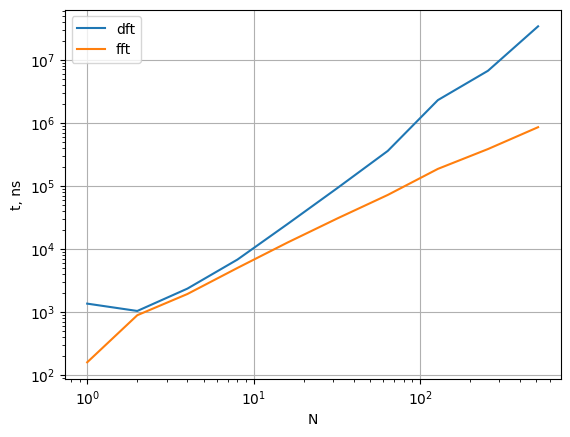

In [23]:
plt.loglog(x, y1, label="dft")
plt.loglog(x, y2, label="fft")
plt.legend(loc="best")
plt.xlabel("N")
plt.ylabel("t, ns")
plt.grid()

##Задание №5
Реализовать на С или С++ процедуру прямого вычисления свертки двух последовательностей по формуле (3). Входные данные загружать из текстового файла (разделитель – пробел), сгенерированного, например, в MATLAB.  

##Задание №6
Реализовать процедуру нахождения дискретной свертки, основанную на БПФ. При вычислении БПФ использовать результаты п. 2 задания.


## Задание N7
Убедится в корректности работы процедуры из п. 5 и п. 6 задания, сравнив полученные результаты с результатами работы встроенной функций MATLAB conv.  


In [24]:
dir_fd = os.open('../maincode/', os.O_RDONLY)
conv = []
fconv = []
with open("Conv.txt", 'r', opener=opener) as file:
  for line in file:
    new_line = line.split(" ")
    conv.append(complex(float(new_line[0]), float(new_line[1])))

with open("FastConv.txt", 'r', opener=opener) as file:
  for line in file:
    new_line = line.split(" ")
    fconv.append(complex(float(new_line[0]), float(new_line[1])))
os.close(dir_fd)

In [25]:
pyt_conv = np.convolve(cx_sig1, cx_sig2)

mse = 0
for i in range(len(pyt_fft)):
  mse += abs((fconv[i] - conv[i])**2)
print("Mse between my_conv and my_fast_conv:", mse / len(conv))

mse = 0
for i in range(len(pyt_fft)):
  mse += abs((pyt_conv[i] - conv[i])**2)
print("Mse between python conv and my conv on c++:", mse / len(pyt_conv))

mse = 0
for i in range(len(pyt_fft)):
  mse += abs((pyt_conv[i] - fconv[i])**2)

print("Mse between python conv and my fast conv on c++:", mse / len(pyt_conv))

Mse between my_conv and my_fast_conv: 4.8548393373473597e-23
Mse between python conv and my conv on c++: 4.163475749850239e-24
Mse between python conv and my fast conv on c++: 3.292523496549614e-23


### Как и ожидалось точность прямого вычисления свретки на С++ будет точнее в сравнение с функцией np.convolve, потому что это реализация прямого вычисления свертки.


## Задание N8
Сравнить производительность алгоритмов вычисления свертки по определению (3) и с помощью БПФ в двух случаях: когда размер одной из последовательностей фиксирован, и когда меняются длины обеих последовательностей.

In [26]:
import matplotlib.pyplot as plt
dir_fd = os.open('../maincode/', os.O_RDONLY)
x = []
y11 = []
y12 = []
y21 = []
y22 = []

with open("time_conv1.txt", "r", opener=opener) as file:
  for line in file:
    new_line = line.split(" ")
    x.append(int(new_line[0]))
    y11.append(float(new_line[1]))

with open("time_fastconv1.txt", "r", opener=opener) as file:
  for line in file:
    new_line = line.split(" ")
    y12.append(float(new_line[1]))


plt.figure()
with open("time_conv2.txt", "r", opener=opener) as file:
  for line in file:
    new_line = line.split(" ")
    y21.append(float(new_line[1]))

with open("time_fastconv2.txt", "r", opener=opener) as file:
  for line in file:
    new_line = line.split(" ")
    y22.append(float(new_line[1]))
os.close(dir_fd)

<Figure size 640x480 with 0 Axes>

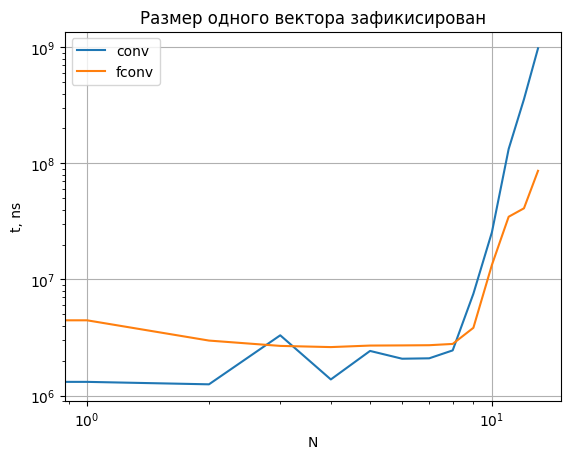

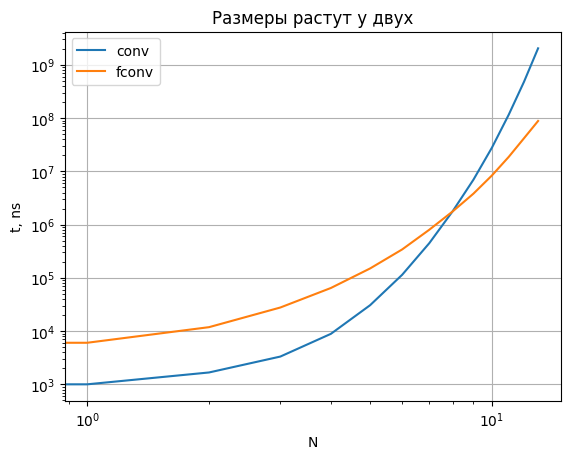

In [28]:
plt.loglog(x, y11, label="conv")
plt.loglog(x, y12, label="fconv")
plt.title("Размер одного вектора зафикисирован")
plt.xlabel("N")
plt.ylabel("t, ns")
plt.legend(loc="best")
plt.grid()

plt.figure()
plt.loglog(x, y21, label="conv")
plt.loglog(x, y22, label="fconv")

plt.title("Размеры растут у двух")
plt.xlabel("N")
plt.ylabel("t, ns")
plt.legend(loc="best")
plt.grid()


### На графике при фиксированном размере одного из векторов видно, что поиск свертки при помощи БПФ, примерно выполняется за одно и то же время, пока второй вектор меньше фиксированной длины первого, как только он становиться больше, время заметно начинает расти. Это происходит, т.к. в самом алгоритме мы расшираем векторы до $2max(M, N)$(где M - длина 1-го вектора, а N - длина 2-го вектора). Поэтому пока мы не достигли фиксированного значения мы постоянно работаем с векторами одной длины.

### Во втором графике при начальных N нахождение свертки при помощи БПФ "проигрывает", потому что если учесть константы, то зависимость примерно $N(2+3log_2(2N))$, а у прямого вычисления свертки $N^2$.